In [80]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [81]:
with open("../tasks/04/results/rolling_stats_all_2024.txt", "r") as f:
    lines = f.readlines()
    lines = [json.loads(line.split("value:")[1].strip().replace("'", "\"")) for line in lines]

for line in lines:
    # ignore the vehicle makes for now
    del line["vehicle_make"]

In [82]:
df = pd.DataFrame(lines)
df = df.astype(float)
df

,vehicle_year_mean,vehicle_year_std,vehicle_year_min,vehicle_year_max,vehicle_year_per_25,vehicle_year_per_50,vehicle_year_per_75
0,2014.405405,5.459487,2002.0,2022.0,2010.00,2015.0,2019.0
1,2014.883333,5.342797,1996.0,2022.0,2012.00,2015.0,2019.0
2,2014.171053,5.940568,1996.0,2022.0,2010.00,2015.0,2019.0
3,2014.661765,5.465251,2001.0,2022.0,2010.75,2016.5,2019.0
4,2014.835443,5.596314,1995.0,2022.0,2012.50,2016.0,2019.0
...,...,...,...,...,...,...,...
29423,2016.278481,5.764473,1995.0,2023.0,2014.50,2017.0,2020.0
29424,2015.873239,5.766726,2003.0,2023.0,2011.00,2016.0,2020.0
29425,2015.710526,5.798427,1998.0,2023.0,2014.00,2018.0,2020.0
29426,2016.268657,5.264467,2002.0,2023.0,2015.00,2017.0,2020.0


In [83]:
df_melted = df.reset_index().melt(id_vars=['index'], value_vars=['vehicle_year_mean', 'vehicle_year_std', 'vehicle_year_min', 'vehicle_year_max', 'vehicle_year_per_25', 'vehicle_year_per_50', 'vehicle_year_per_75'])
df_melted.columns = ['Stream Index', 'Statistic', 'Value']
df_melted

,Stream Index,Statistic,Value
0,0,vehicle_year_mean,2014.405405
1,1,vehicle_year_mean,2014.883333
2,2,vehicle_year_mean,2014.171053
3,3,vehicle_year_mean,2014.661765
4,4,vehicle_year_mean,2014.835443
...,...,...,...
205991,29423,vehicle_year_per_75,2020.000000
205992,29424,vehicle_year_per_75,2020.000000
205993,29425,vehicle_year_per_75,2020.000000
205994,29426,vehicle_year_per_75,2020.000000


In [84]:
# subsample 1% of the data to make the plot readable - too much clutter otherwise
df_melted = df_melted[df_melted["Stream Index"] % 100 == 0]
df_melted

,Stream Index,Statistic,Value
0,0,vehicle_year_mean,2014.405405
100,100,vehicle_year_mean,2013.967213
200,200,vehicle_year_mean,2014.654321
300,300,vehicle_year_mean,2016.138889
400,400,vehicle_year_mean,2015.024390
...,...,...,...
205568,29000,vehicle_year_per_75,2021.000000
205668,29100,vehicle_year_per_75,2020.000000
205768,29200,vehicle_year_per_75,2020.000000
205868,29300,vehicle_year_per_75,2020.000000


C:\Users\Luka\AppData\Local\Temp\ipykernel_25804\3573035764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Statistic'] = df_plot['Statistic'].replace({'vehicle_year_mean': 'Mean', 'vehicle_year_per_25': '25th Percentile', 'vehicle_year_per_50': '50th Percentile (Median)', 'vehicle_year_per_75': '75th Percentile'})


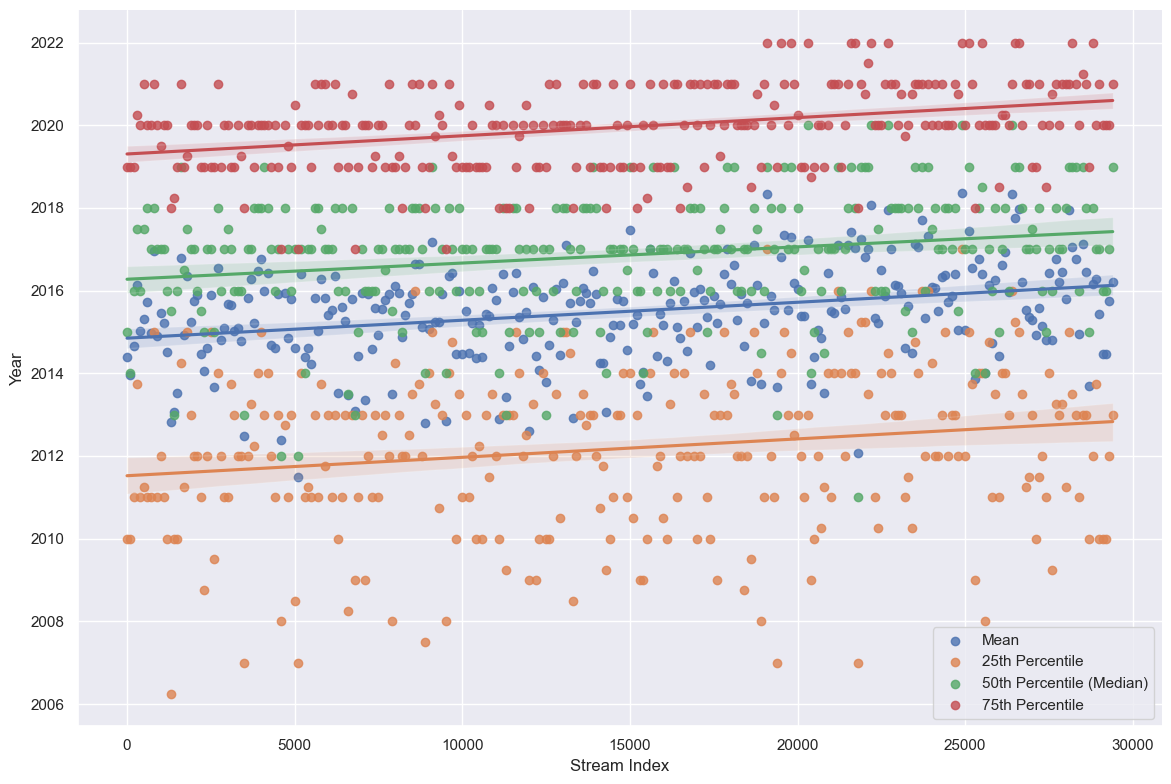

In [88]:
df_plot = df_melted[df_melted["Statistic"].isin(['vehicle_year_mean', 'vehicle_year_per_25', 'vehicle_year_per_50', 'vehicle_year_per_75'])]
df_plot['Statistic'] = df_plot['Statistic'].replace({'vehicle_year_mean': 'Mean', 'vehicle_year_per_25': '25th Percentile', 'vehicle_year_per_50': '50th Percentile (Median)', 'vehicle_year_per_75': '75th Percentile'})

ax = sns.lmplot(data=df_plot, x='Stream Index', y='Value', hue='Statistic', height=8, aspect=1.5)
ax._legend.remove()
plt.ylabel('Year')
plt.legend(loc='lower right')